## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 33.2 MB/s 
     |████████████████████████████████| 212 kB 65.9 MB/s 


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [ ]:
tweets, labels = tweet(train)

In [ ]:
tweets[0],labels[0]

('i didnt feel humiliated', 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
token = Tokenizer(num_words=100000, oov_token='<UNK>')
token.fit_on_texts(tweets)

In [ ]:
token.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

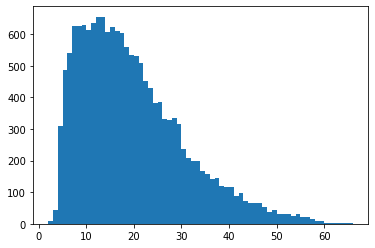

In [ ]:
length = [len(t.split(' ')) for t in tweets]
plt.hist(length, bins = len(set(length)))
plt.show()

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def sequence(token, tweets):
  sequences = token.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = maxlen)
  return padded

In [ ]:
pad_train = sequence(token, tweets)

In [ ]:
pad_train[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{'sadness', 'joy', 'anger', 'surprise', 'fear', 'love'}


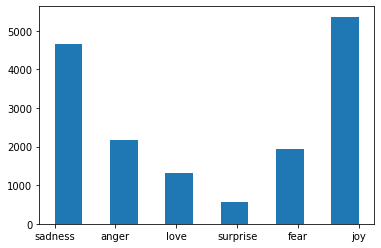

In [ ]:
plt.hist(labels, bins = 11)
plt.show()

In [ ]:
class_index = dict((c, i) for i, c in enumerate(classes))
index_class = dict((v, k) for k, v in class_index.items())

In [ ]:
class_index

{'sadness': 0, 'joy': 1, 'anger': 2, 'surprise': 3, 'fear': 4, 'love': 5}

In [ ]:
index_class

{0: 'sadness', 1: 'joy', 2: 'anger', 3: 'surprise', 4: 'fear', 5: 'love'}

In [ ]:
name_id = lambda labels: np.array([class_index.get(x) for x in labels])

In [ ]:
train_label = name_id(labels)
print(train_label[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(30000, 16, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            480000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 495,926
Trainable params: 495,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweet, val_label = tweet(val)
val_seq = sequence(token, val_tweet)
val_label = name_id(val_label)

In [ ]:
val_tweet[0], val_label[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
   pad_train, train_label,
   validation_data = (val_seq, val_label),
   epochs = 20,
   callbacks = [
       tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2)
   ]
)

Epoch 1/20
500/500 [==============================] - 15s 14ms/step - loss: 1.2980 - accuracy: 0.4888 - val_loss: 0.7553 - val_accuracy: 0.7255
Epoch 2/20
500/500 [==============================] - 7s 13ms/step - loss: 0.5431 - accuracy: 0.8121 - val_loss: 0.5618 - val_accuracy: 0.8110
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 0.3353 - accuracy: 0.8879 - val_loss: 0.5103 - val_accuracy: 0.8420
Epoch 4/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2311 - accuracy: 0.9266 - val_loss: 0.4592 - val_accuracy: 0.8555
Epoch 5/20
500/500 [==============================] - 6s 12ms/step - loss: 0.1804 - accuracy: 0.9427 - val_loss: 0.4524 - val_accuracy: 0.8635
Epoch 6/20
500/500 [==============================] - 6s 12ms/step - loss: 0.1425 - accuracy: 0.9523 - val_loss: 0.4744 - val_accuracy: 0.8685
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.1140 - accuracy: 0.9634 - val_loss: 0.4752 - val_accuracy: 0.869

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

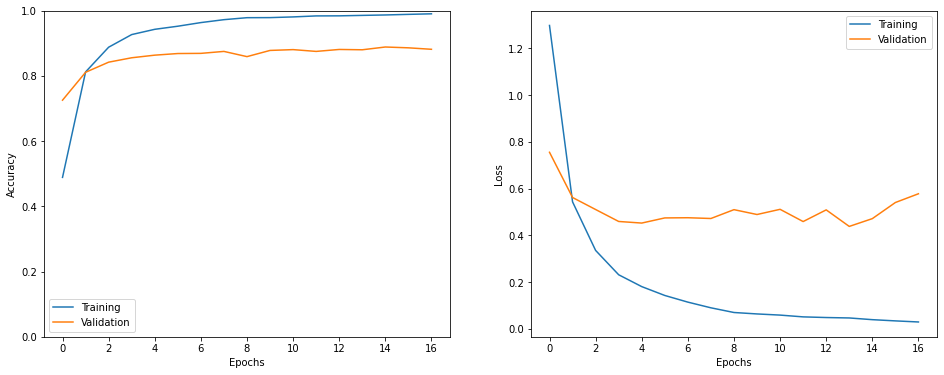

In [ ]:
show_history(h)

In [ ]:
test_tweet, test_label = tweet(test)
test_seq = sequence(token, test_tweet)
test_label = name_id(test_label)

In [ ]:
_ = model.evaluate(test_seq, test_label)

63/63 [==============================] - 0s 7ms/step - loss: 0.5260 - accuracy: 0.8820


In [ ]:
i =random.randint(0, len(test_label) - 1)
print('Sentence:', test_tweet[i])
print('Emotion:', index_class[test_label[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
pred_class = index_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

Sentence: i am trying not to feel bitter but how else can i feel when it seems my desire is pretty much impossible
Emotion: anger
1/1 [==============================] - 1s 1s/step
Predicted Emotion: anger


In [ ]:
!pip install predict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PREDICT-3.1.16-py3-none-any.whl (57 kB)
     |████████████████████████████████| 2.0 MB 17.4 MB/s 
     |████████████████████████████████| 34.5 MB 95.8 MB/s 
     |████████████████████████████████| 26.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.4 MB 65.1 MB/s 
     |████████████████████████████████| 52.8 MB 178 kB/s 
  Using cached phasepack-1.5.tar.gz (15 kB)
     |████████████████████████████████| 109 kB 75.7 MB/s 
     |████████████████████████████████| 555 kB 64.2 MB/s 
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26984 sha256=a05bc0f7b032269e6d50bc62182e45ebb46abd1d05894779764a2c4d42ee5ecb
  Stored in directory: /root/.cache/pip/wheels/c4/c9/8e/6e2318b9f30069caedee0ed0f2e9ac6ba1f3835bd4e779bbe8
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp38-cp38-linux_x86_64.whl size=178969 sha256=484402a3fa85957ad34db05f28e0

In [ ]:
predict_x = model.predict(test_seq) 
pred = np.argmax(predict_x,axis=1)


63/63 [==============================] - 0s 5ms/step


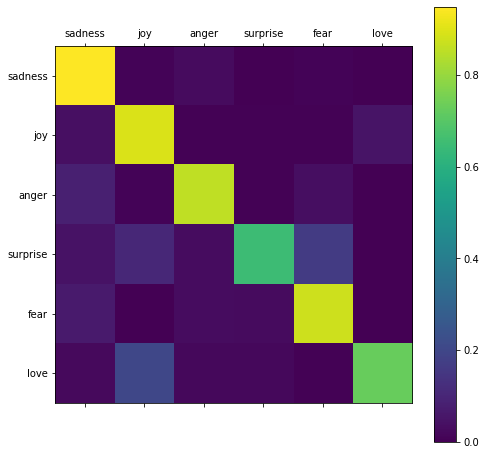

In [ ]:
show_confusion_matrix(test_label, pred, list(classes))